# Lab-03: Data Visualization and Feature Analysis

In this lab, you will learn and gain hands-on experience on the use of Matplotlib for data visualization and Pandas for feature analysis.

Follow the instruction and run the code cells. Make sure you understand what happens in every stage. <br>

<b>Helpful Links:</b>

  https://matplotlib.org/stable/api/index.html

  https://matplotlib.org/cheatsheets/cheatsheets.pdf
  
  https://seaborn.pydata.org/api.html

  https://plotly.com/python-api-reference/

  http://www.utc.fr/~jlaforet/Suppl/python-cheatsheets.pdf


> "*Welcome to Python, we have a library for that.*"\
\- *Scott Sanner*

## Introduction to Matplotlib

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px

Components of matplotlib plot:

![](https://files.realpython.com/media/fig_map.bc8c7cabd823.png)

Matplotlib has two interfaces:

1. pyplot interface (function-based, implicit): consists of functions in the pyplot module. Figure and Axes are manipulated through these functions and are only implicitly present in the background.

2. Axes interface (object-based, explicit): create a Figure and one or more Axes objects, then explicitly use methods on these objects to add data, configure limits, set labels etc.

### Function-based

Plotting two points using `.scatter`


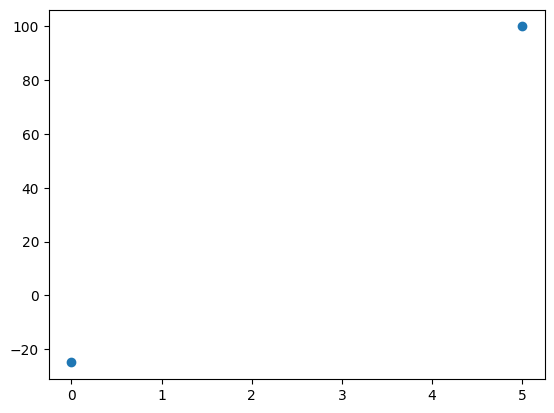

In [2]:
xpoints = np.array([0, 5])
ypoints = np.array([-25, 100])

# scatter plot
plt.scatter(xpoints, ypoints)

# display all open figures.
plt.show() # tt the end of .show() the figure is closed and thus unregistered from pyplot

Plotting a line using `.plot`


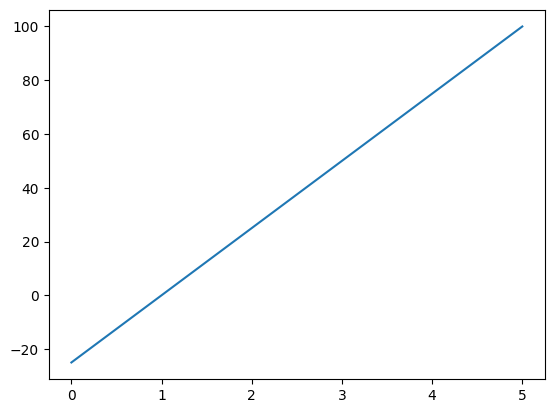

In [3]:
xpoints = np.array([0, 5])
ypoints = np.array([-25, 100])

# line plot
plt.plot(xpoints, ypoints)

plt.show()

Setting the line style


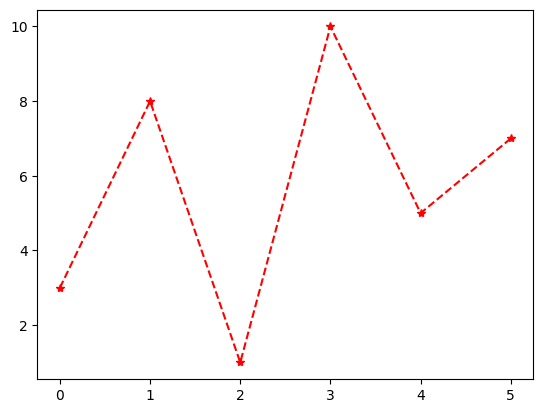

In [4]:
ypoints = np.array([3, 8, 1, 10, 5, 7])

# if x data is not specified, .plot defaults to x = np.arange(len(y))
plt.plot(ypoints, marker='*', color="r", linestyle="--") # can also use 'ls' parameter to set linestyle,
                                                         # and 'c' for color
plt.show()

Multiple line plots


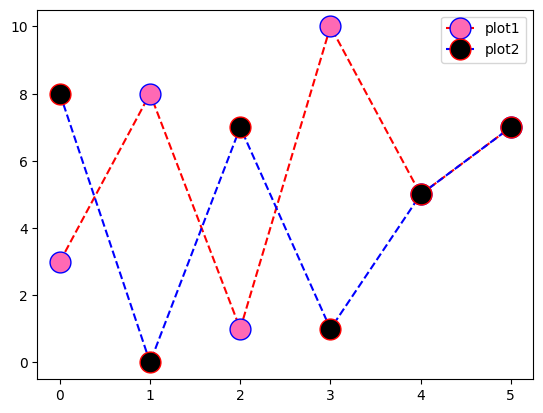

In [5]:
ypoints = np.array([3, 8, 1, 10, 5, 7])

plt.plot(ypoints, ls="--", marker=".", c='r', ms=30, mec='b', mfc='hotpink', label="plot1")

# ls: linestyle
# c: color
# ms: markersize
# mec: markeredgecolor
# mfc: markerfacecolor

ypoints2 = np.array([8, 0, 7, 1, 5, 7])
plt.plot(ypoints2, linestyle="--", marker=".", color='b', markersize=30, markeredgecolor='r',
         markerfacecolor='k', label="plot2")

plt.legend() # display the labels as legend

Setting grids


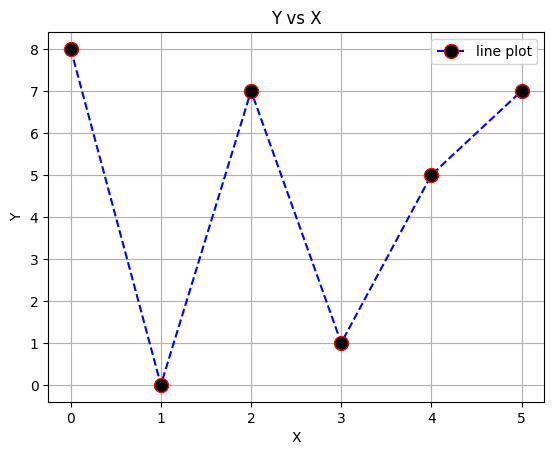

In [6]:
ypoints2 = np.array([8, 0, 7, 1, 5, 7]) # data

# line plot
plt.plot(ypoints2, ls="--", marker=".", c='b', ms=20, mec='r', mfc='k', label="line plot")

plt.xlabel("X") # x-axis label
plt.ylabel("Y") # y-axis label
plt.title("Y vs X") # title of plot
plt.legend() # display the label as legend
plt.grid() # display the grid lines
plt.show() # display figure

### Object-based

Thus far, we have looked at matplotlib **stateful** functions (e.g. plt.plot). With these functions, we are only able to manipulate one figure/axes (which is the current one) at a time because Matplotlib internally keeps track of the current state of the plotting environment. ```.gcf``` method can be used to get current figure object, while ```.gca``` for acessing curent axes.

To directly (explicitly) modify an underlying figure or axes object, we use the **object oriented programming (OOP)** approach of Matplotlib. This approach is stateless and you are always aware of exactly what object is being modified.



Consider the matplotlib stateful plot below:

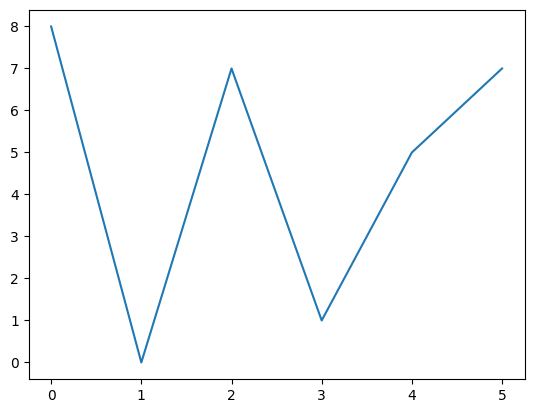

In [7]:
plt.plot(ypoints2)

plt.show()

The matplotlib OOP equivalent is:


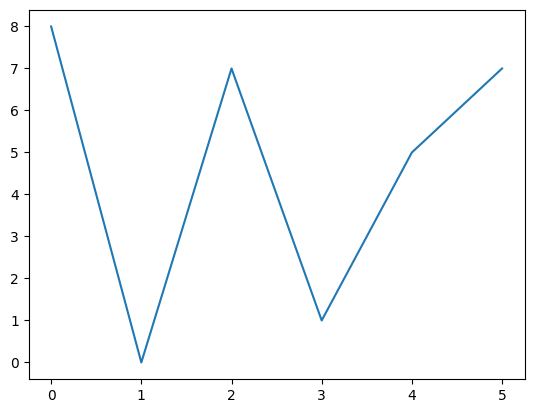

In [8]:
fig = plt.gcf() # gcf = get current figure. Used to get current figure if exists else create a new
ax = fig.gca() #  gca = get current axes. Used to get current axes in the figure if exists else create a new

ax.plot(ypoints2) # plot in the axes

fig.show() # display the figure window

## Data Visualization

Data Visualization displaying information in data as pcitures. It is an important step in Exploratory Data Analysis (EDA) as it can be used to guide decisions regarding how the data would be cleaned, used, and interpreted. The type of data determine the type of plot we can use to visualize it.

### Univariate Plots

These are plots that can be used to visualize only one dimension at a time. The type of univariate plot to be used to visualize a data is dependent on the data type (whether it is continuous or discrete).

Loading iris data using Seaborn library.

**Note**: *Seaborn is python library for data visualization. It is built on top of Matplotlib and it provides more aesthetic plots and simpler interface for generating plots than Matplotlib.*

Let's first use Seaborn to load Iris data.

The [Iris Dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

In [9]:
iris_df = sns.load_dataset('iris')
print(iris_df.shape)
iris_df.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Continuous

Titanic data gotten from Kaggle. Click on [this link](https://www.kaggle.com/competitions/titanic/data) to read more about the data. First, let's do some data cleaning.

In [10]:
titanic_df = pd.read_csv("https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/titanic_train.csv")

print(titanic_df.shape)
titanic_df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Checking the percentage of missing values per column (as a fraction of the number of rows in the data).

In [11]:
titanic_df.isnull().sum() / titanic_df.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

We will replace the missing values in `Embarked` column with their mode because `Embarked` is a discrete variable. First, let's check the count per distinct values in the `Embarked` column.

In [12]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Replacing missing values in `Embarked` feature.

In [13]:
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode().iloc[0])

The [metadata](https://www.kaggle.com/competitions/titanic/data#:~:text=should%20look%20like.-,data%20Dictionary,-Variable) for the datasets on kaggle shows that the values in the 'Embarked' column are abbreviations for the port of departure. We may want to replace them with the actual port names. To do this we need to **transform** the 'Embarked' column.

Defining a function to return the full form for a given short-form for values in `'Embarked'` column.


In [14]:
def get_port_of_embarkment(embarked: str) -> str:
    ports = {"C": "Cherbourg", "Q": "Queenstown", "S": "Southampton"}

    return ports.get(embarked, None)

Using `.apply` to apply `get_port_of_embarkment` function to each row in the `Embarked` column.


In [15]:
titanic_df['Embarked'] = titanic_df['Embarked'].apply(get_port_of_embarkment)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton


Rechecking for missing values.

In [16]:
titanic_df.isnull().sum() / titanic_df.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.000000
dtype: float64

Checking the number of unique values per column.

In [17]:
titanic_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

The metadata tells us that `pclass` is a proxy for socio-economic status (SES). We will create a derived column which is the combination of 'Sex' and Pclass'.

In [18]:
titanic_df['Pclass'] = titanic_df['Pclass'].apply(lambda x: ("upper", "middle", "lower")[x-1])
titanic_df['Sex_Pclass'] = titanic_df.apply(lambda x: x['Sex'] + "_" + x['Pclass'], axis=1)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Pclass
0,1,0,lower,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,male_lower
1,2,1,upper,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,female_upper
2,3,1,lower,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,female_lower
3,4,1,upper,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,female_upper
4,5,0,lower,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton,male_lower


Summary Statistics

In [19]:
titanic_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Summary statistics are good but sometimes plots makes it easier to have an overview of the distribution of a data.

1. Histogram Plot

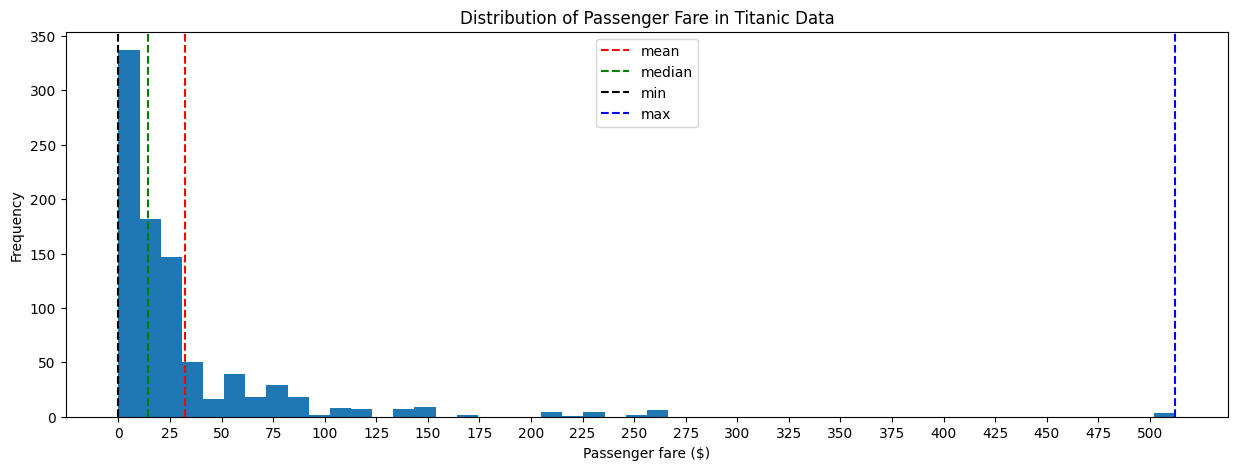

In [20]:
plt.figure(figsize=(15, 5))
plt.hist(titanic_df['Fare'], bins=50)
plt.xlabel("Passenger fare ($)")
plt.xticks(np.arange(0, titanic_df['Fare'].max(), 25))
plt.ylabel("Frequency")
plt.title("Distribution of Passenger Fare in Titanic Data")

plt.axvline(titanic_df['Fare'].mean(), color='red', ls='--', label='mean')
plt.axvline(titanic_df['Fare'].median(), color='green', ls='--', label='median')
plt.axvline(titanic_df['Fare'].min(), color='black', ls='--', label='min')
plt.axvline(titanic_df['Fare'].max(), color='blue', ls='--', label='max')

plt.legend(loc="upper center")

plt.show()

We see that the distribution of passenger's fare in the Titanic data is right skewed since the shape of the distribution is not symmetric about the median and the data has a long right tail (left-skewed data have long left tail). Also, the mean is more than twice the median and it's closer to the max than the median (thus indicating right-skweness).

2. Density Plot

Density plots can be thought of as plots of smoothed histograms thus making it easier to see the generalized shape of a distribution.

We will Seaborn to generate the plot because it provides a simpler interface. Note that it can be less flexible and customizable than matplotlib (which provides interfaces to manipulate plots from the low level).

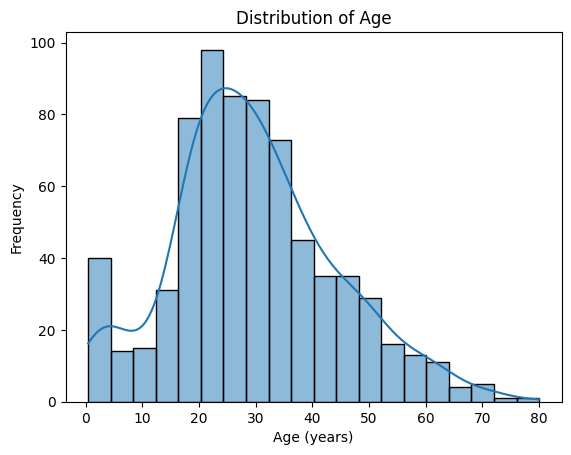

In [21]:
ax = sns.histplot(titanic_df['Age'], kde=True)

# we can still use some Matplotlib's functions to manipulate Seaborn's plots because Seaborn was built on top of Matplotlib.
plt.xlabel("Age (years)")
plt.ylabel("Frequency")
plt.title("Distribution of Age")
plt.show()

3. Boxplot

What is the problem of histogram? While it shows you the shape of a distribution, it is difficult to point out some statistics from it e.g. median, percentiles etc. With boxplots (also known as box-and-whisker plot), we can easily see percentiles and outliers.

![boxplot](https://miro.medium.com/max/9000/1*2c21SkzJMf3frPXPAR_gZA.png)

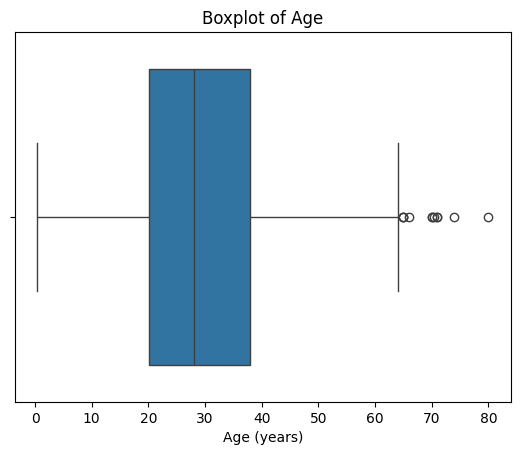

In [22]:
ax = sns.boxplot(data=titanic_df, x='Age')
plt.xlabel("Age (years)")
plt.title("Boxplot of Age")
plt.show()

From the boxplot above, the median (second quartile) age is around 28years, while the min = 0, first quartile is 20, third quartile is 38, maximum value **in the data** is 80, and the "*maximum*" value beyond which data points are considered as outliers is around 63 (i.e $Q3 + 1.5*IQR$, that of "*minimum*" is $Q1 - 1.5*IQR$). Note that Seaborn's boxplots can be positioned vertically too. To make them vertical, pass the data to the `y` parameter instead of the `x` parameter of the `sns.boxplot` function.

#### Discrete

1. Bar Plot

Vertical Barplot.

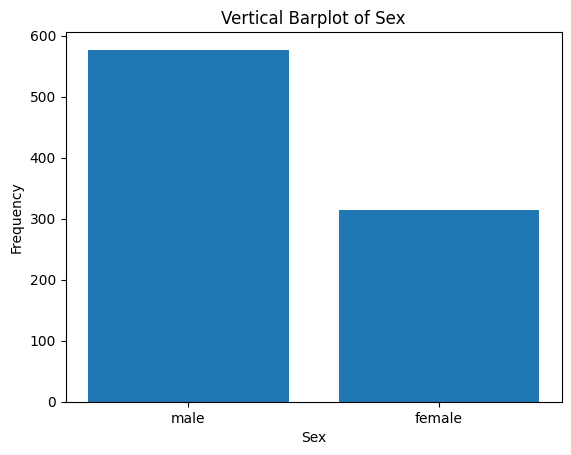

In [23]:
count_by_sex = titanic_df['Sex'].value_counts()
plt.bar(count_by_sex.index, count_by_sex.values)
plt.ylabel("Frequency")
plt.xlabel("Sex")
plt.title("Vertical Barplot of Sex")
plt.show()

From the plot above, the data has more male passengers than female.

Horizontal Barplots. This sometimes make it easier to visualize categories by rank.

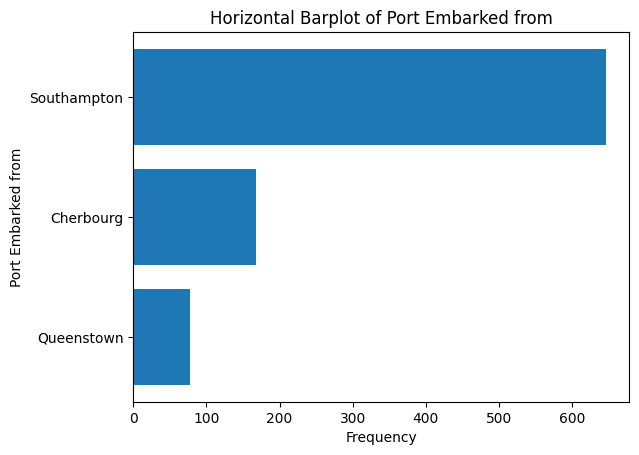

In [24]:
count_by_embarked = titanic_df['Embarked'].value_counts(ascending=True)
plt.barh(count_by_embarked.index, count_by_embarked.values)
plt.xlabel("Frequency")
plt.ylabel("Port Embarked from")
plt.title("Horizontal Barplot of Port Embarked from")
plt.show()

From the barplot above, we see that most passengers embarked from Southampton.

2. Pie Chart: useful for showing data as a percentage of a whole.

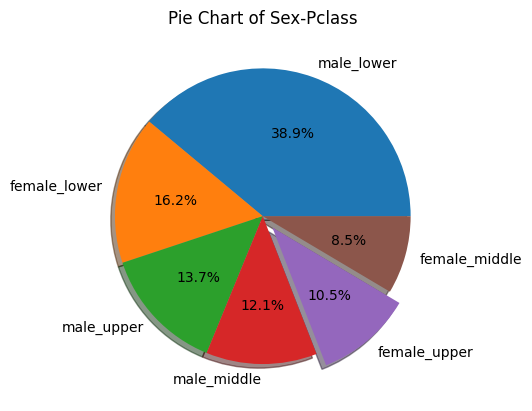

In [25]:
Sex_Pclass_count = titanic_df["Sex_Pclass"].value_counts() / titanic_df.shape[0]

plt.pie(Sex_Pclass_count.values, labels=Sex_Pclass_count.index, shadow=True, autopct='%.1f%%', explode=(0, 0, 0, 0, 0.1, 0))
plt.title("Pie Chart of Sex-Pclass")

plt.show()

The chart above shows that male in lower class are more than any categories in the Sex-Pclass feature.

### Bivariate Plots

This involves visualizing two variables in a plot.

#### Continuous VS Continuous

1. Scatter Plot

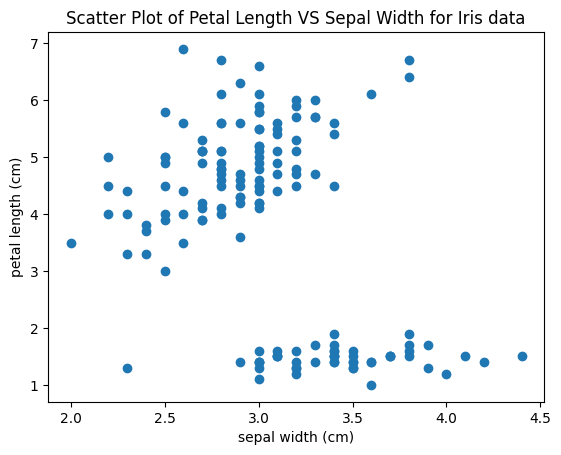

In [26]:
plt.scatter(iris_df['sepal_width'], iris_df['petal_length']) #
plt.xlabel('sepal width (cm)')
plt.ylabel('petal length (cm)')
plt.title(f"Scatter Plot of Petal Length VS Sepal Width for Iris data")
plt.show()

From the plot above, we see two obvious cluters.

#### Discrete VS Discrete

1. Contigency Table

In [27]:
crosstab_sex_pclass = pd.crosstab(index=titanic_df['Sex'], columns=titanic_df['Pclass']) # contigency table
crosstab_sex_pclass

Pclass,lower,middle,upper
Sex,,,
female,144,76,94
male,347,108,122


To quickly identity patterns in a contigency table, we can view it as a heatmap.


2. Discrete Heatmap

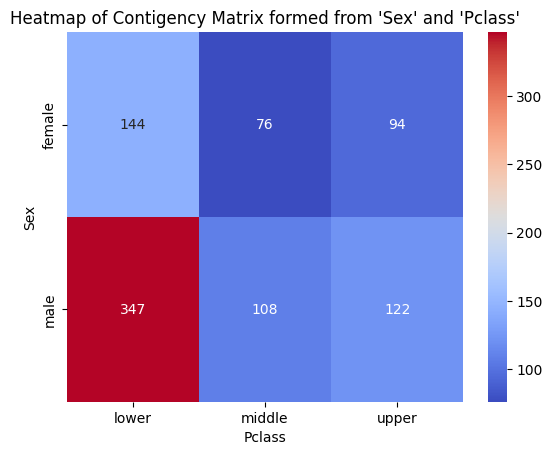

In [28]:
ax = sns.heatmap(data=crosstab_sex_pclass, annot=crosstab_sex_pclass, fmt=".3g", cmap='coolwarm')
plt.title("Heatmap of Contigency Matrix formed from 'Sex' and 'Pclass'")
plt.show()

#### Discrete VS Continuous

1. Multiple Boxplots

Visualizing the distribution of a feature per categories in another feature.

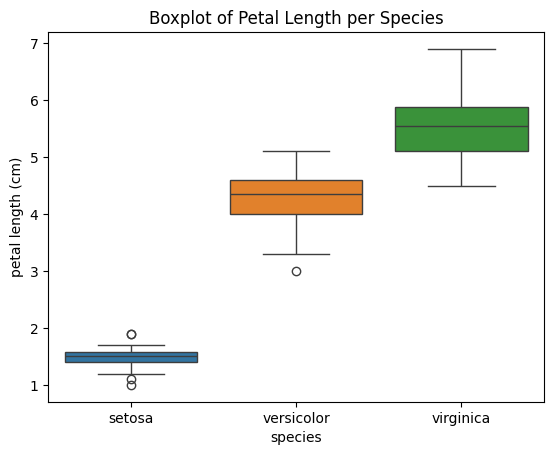

In [29]:
ax = sns.boxplot(data=iris_df, x='species', y='petal_length', hue='species') # the hue parameter is the column in the data to be used for color encoding
plt.ylabel('petal length (cm)')
plt.xlabel('species')
plt.title('Boxplot of Petal Length per Species')
plt.show()

2. Overlapping Histogram

Bi-modal distribution usually indicate some relationship.

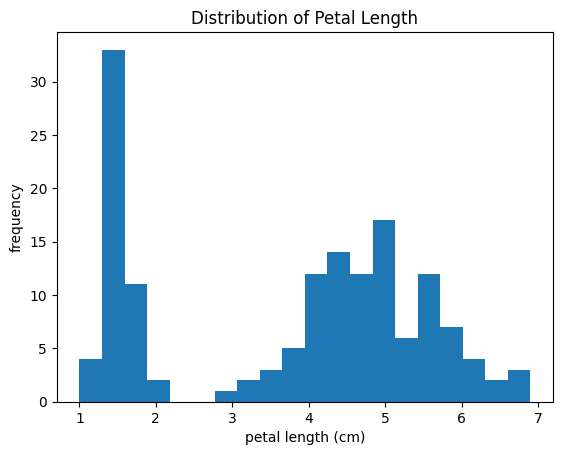

In [30]:
plt.hist(iris_df['petal_length'], bins=20)
plt.xlabel('petal length (cm)')
plt.ylabel('frequency')
plt.title('Distribution of Petal Length')
plt.show()

We clearly see two distributions in the `'petal_length'` column. If we create a new column named `'species_v2'` such that it equals 'setosa' if `species` is 'setosa', otherwise 'not setosa':

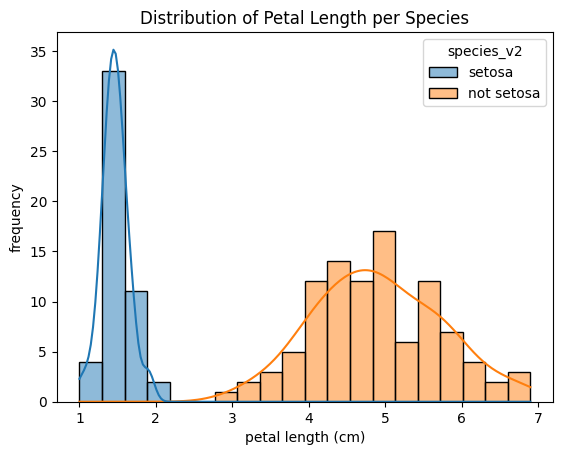

In [31]:
iris_df['species_v2'] = iris_df['species'].apply(lambda x: 'setosa' if x=='setosa' else 'not setosa')
ax = sns.histplot(data=iris_df, x='petal_length', hue='species_v2', bins=20, kde=True)
plt.xlabel('petal length (cm)')
plt.ylabel('frequency')
plt.title('Distribution of Petal Length per Species')
plt.show()

From the above, we clearly see that the two distributions are those of 'setosa' / 'not setosa' groups.

### Multivariate Plots

This involves visualizing more than two variables in a plot.

Example: scatter plot of `petal_length` VS `sepal_width` colored by `species`.

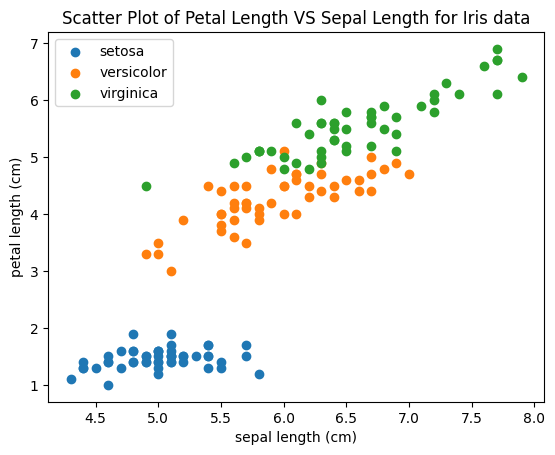

In [32]:
unique_species = iris_df['species'].unique()

x = iris_df['sepal_length']
y = iris_df['petal_length']

for species in unique_species:
    species_mask = iris_df['species'] == species
    plt.scatter(x[species_mask], y[species_mask], label=species)

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title(f"Scatter Plot of Petal Length VS Sepal Length for Iris data")

plt.legend()

plt.show()

Bubble Plot: Scatter plot of two continuous variables with a third continuous variable indicating the size of the data marker.

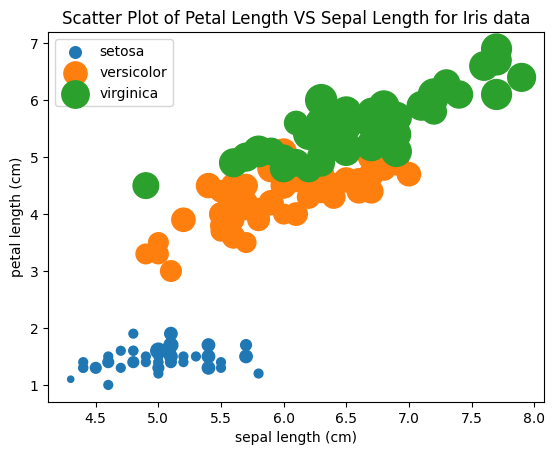

In [33]:
unique_species = iris_df['species'].unique()

x = iris_df['sepal_length']
y = iris_df['petal_length']
z = iris_df['petal_width']

for species in unique_species:
    species_mask = iris_df['species'] == species
    plt.scatter(x[species_mask], y[species_mask], s=z[species_mask]*200, label=species)

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title(f"Scatter Plot of Petal Length VS Sepal Length for Iris data")

plt.legend()

plt.show()

We can also use a fourth variable to set the transparency of the bubble plot.

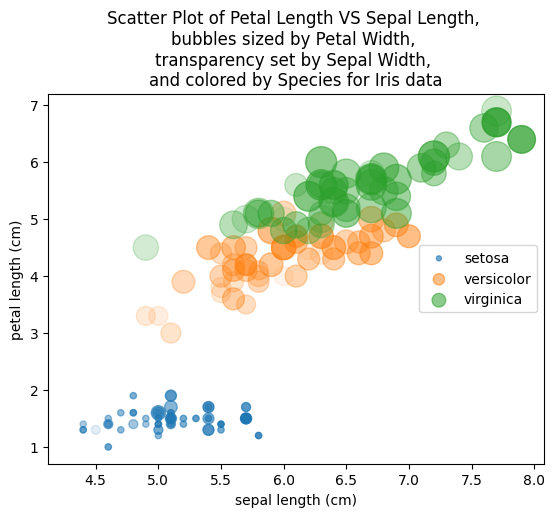

In [34]:
unique_species = iris_df['species'].unique()

x = iris_df['sepal_length']
y = iris_df['petal_length']
z = iris_df['petal_width']
a = iris_df['sepal_width']

z = (z - z.min()) / (z.max() - z.min()) # scaling z to be between 0 and 1 so it is comparable across species
a = (a - a.min()) / (a.max() - a.min()) # alpha (transparency value) ranges between 0 and 1

for species in unique_species:
    species_mask = iris_df['species'] == species
    plt.scatter(x[species_mask], y[species_mask], s=z[species_mask]*500, alpha=a[species_mask], label=species)

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title(f"Scatter Plot of Petal Length VS Sepal Length, \nbubbles sized by Petal Width, \ntransparency set by Sepal Width, \nand colored by Species for Iris data")

plt.legend(markerscale=0.5, loc="center right")

plt.savefig("iris_df.jpg", bbox_inches="tight") # save figure before running .show because attempting to save after .show is ran will fail since .show
                                                # displays and de-registers the figure thereby making it unavailable to other objects or functions.

plt.show()

In the plot above, we have visualized all the variables in Iris data.



### Subplots

Subplots are multiple axes objects in a single figure object.

1 x 2 subplot


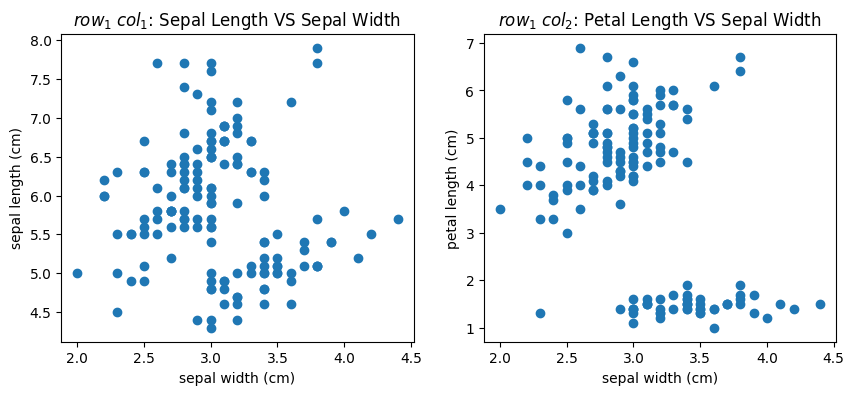

In [35]:
fig = plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(iris_df['sepal_width'], iris_df['sepal_length'])
plt.xlabel("sepal width (cm)")
plt.ylabel("sepal length (cm)")
plt.title("$row_1 \; col_1$: Sepal Length VS Sepal Width") # matplotlib title and label texts can be formatted as latex equations

plt.subplot(122) # plt.subplot(122) is the same as plt.subplot(1, 2, 2)
plt.scatter(iris_df['sepal_width'], iris_df['petal_length'])
plt.xlabel("sepal width (cm)")
plt.ylabel("petal length (cm)")
plt.title("$row_1 \; col_2$: Petal Length VS Sepal Width")

plt.show()

2 x 3 suplot using Matplotlib's function based interface.

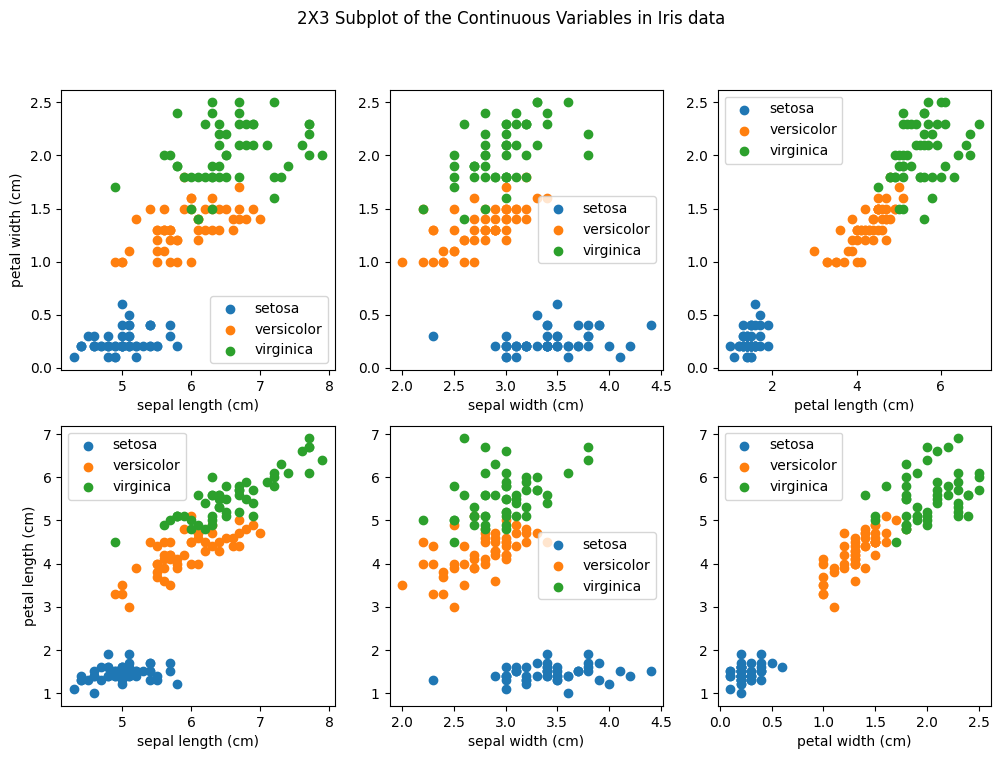

In [36]:
continuous_cols = iris_df.columns[:4] # selecting the continuous variables int the data

rows = ('petal_width', 'petal_length') # variables to use as y-axis for each subplot row

unique_species = iris_df['species'].unique() # unique species

# creating figure object and setting the figsize.
plt.figure(figsize=(12, 8))  # figure width set to 12in and height to 8in

subplot_num = 0 # variable to track subplot_num
for i in range(2):
    cols = [col for col in continuous_cols if col != rows[i]] # all continuous columns except the one to be used as
                                                              # y-axis for the current row
    for j in range(3):
        y = iris_df[rows[i]] # y data
        x = iris_df[cols[j]] # x data

        subplot_num += 1 # subplot_num needs to increase linearly

        plt.subplot(2, 3, subplot_num) # create subplot

        # plot data of x and y for each species
        for species in unique_species:
            species_mask = iris_df['species'] == species
            plt.scatter(x[species_mask], y[species_mask], label=species)

        plt.legend() # display the labels as legend

        plt.xlabel(f"{' '.join(cols[j].split('_'))} (cm)") # display the x label

        # display y label for subplot_num = 1 or 4 (since each row will share a y-axis, this will make things neater)
        if subplot_num in (1, 4):
            plt.ylabel(f"{' '.join(rows[i].split('_'))} (cm)")

plt.suptitle("2X3 Subplot of the Continuous Variables in Iris data") # set the super title (title of the figure)

plt.show() # display figure

We can also visualize all pairs of continuous variables pairplots.

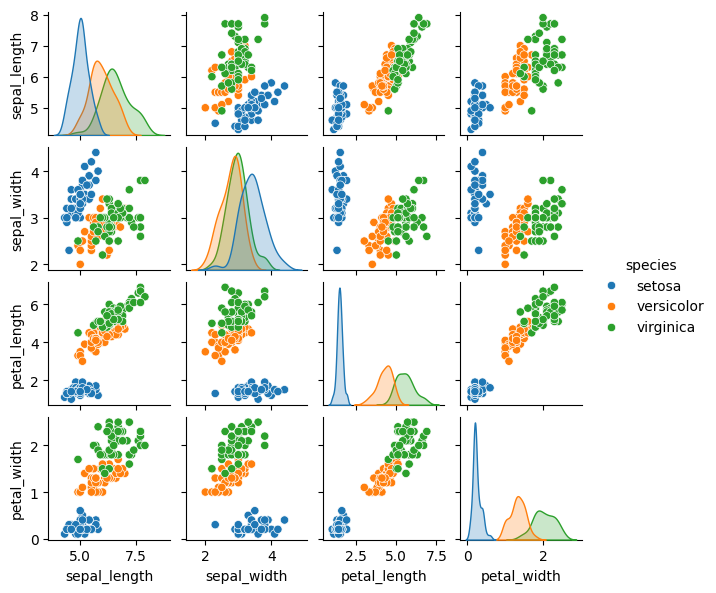

In [37]:
sns.pairplot(iris_df, hue="species", height=1.5);

From the plot above, we can see that 'setosa' on an average have short petal length and width, and short sepal length; 'versicolor' have medium length and width for both petal and sepal; and 'virginica' have long petal and sepal lengths, and long petal width.

## Feature Analysis

1. Correlation

- Suitable for Continuous VS Continuous

Given two vectors $x$ and $y$ $\in \mathbb{R}^n$, the pearson correlation coefficient between $x$ and $y$ is given by:

$$r = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i-\bar{x})^2\sum_{i=1}^{n}(y_i-\bar{y})^2}}$$

It is worth noting that $r \in [-1, 1]$. Values close to 1 indicate high positive linear correlation, those close to -1 indicate high negative linear correlation, and those close to 0 indicate no linear correlation.

Correlation matrix: a square matrix such that the element in the i-th row and j-th column is the correlation coefficient between the i-th variable and j-th variable. Where $i, j \in \{1...k\}$, $k$ is the number of variables.


In [38]:
np.corrcoef(iris_df['petal_length'].values, iris_df['sepal_length'].values) # correlation matrix between petal_length and sepal_length

array([[1.        , 0.87175378],
       [0.87175378, 1.        ]])

Note that the matrix is a 2-D array. It is also a symmetric matrix because the correlation of a variable and itself is 1 ($r(x, x) = 1,  r(y, y) = 1$), and the correlation of x and y is same as that of y and x ($r(x, y) = r(y, x)$). You can use Numpy's indexing ability to retrieve the correlation of interest. E.g `np.corrcoef(x, y)[0, 1]` to get $r(x, y)$.

In [39]:
# correlation matrix: pairwise correlation between all the continuous variables in the data
corr_arr = iris_df.corr(method='pearson', numeric_only=True)
index = np.array(corr_arr.index)
columns = np.array(corr_arr.columns)
corr_arr = corr_arr.values
corr_arr

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

Plotting correlation heatmap

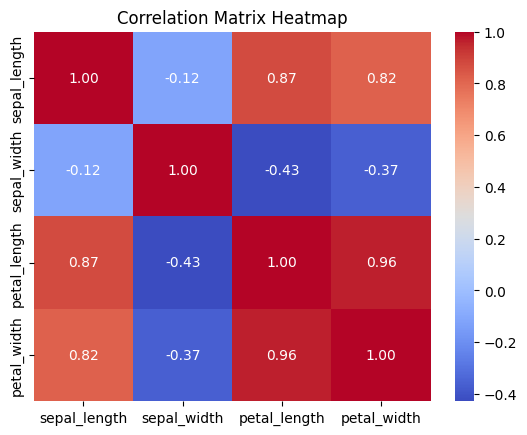

In [40]:
ax = sns.heatmap(data=corr_arr,
                cmap=plt.cm.coolwarm,
                annot=corr_arr,
                fmt=".2f",
                xticklabels=index,
                yticklabels=columns
                 )
plt.title("Correlation Matrix Heatmap")
plt.show()

From the correlation heatmap above, we can see that `petal_length` and `petal_width` have a very high correlation coefficient, while `sepal_length` and `sepal_width` have a very low correlation coefficient. Can you tell what you can observe in the scatter plots of these variables as shown in [this 4x4 pairplot](#scrollTo=3cxJk8OO4BoV&line=1&uniqifier=1)?

2. Mutual Information (MI).

- Suitable for Discrete VS Discrete.

Think a table with two columns:




In [41]:
# e.g:
titanic_df[['Sex_Pclass', 'Survived']].head(10) # showing the first 10 rows of the two columns

,Sex_Pclass,Survived
0,male_lower,0
1,female_upper,1
2,female_lower,1
3,female_upper,1
4,male_lower,0
5,male_lower,0
6,male_upper,0
7,male_lower,0
8,female_lower,1
9,female_middle,1


MI helps us to compare the distributions in the two columns to see if the joint distribution is different from the product of the individual distributions.


The Mutual Information between two variables $X$ and $Y$ is given by $\operatorname{I}(X; Y)$, and is defined as:
$$\operatorname{I}(X; Y) = \sum_{y \in \mathcal Y} \sum_{x \in \mathcal X}{ P_{(X,Y)}(x, y) \log\left(\frac{P_{(X,Y)}(x, y)}{P_X(x)\,P_Y(y)}\right) }$$

where $P_{(X,Y)}$ is the joint probability ''mass'' function of $X $ and  $Y $, and  $P_X $ and  $P_Y $ are the marginal probability mass functions of  $X $ and  $Y $ respectively.

Note that $ \log\left(\frac{P_{(X,Y)}(x, y)}{P_X(x)\,P_Y(y)}\right)$ is the Pointwise Mutual Information (PMI) between $x$ and $y$.

Defining a function to calculate PMI.

In [42]:
def cal_PMI(var: str, target_var: str = "Survived", data: pd.DataFrame = titanic_df) -> pd.DataFrame:
    contingency_table = pd.crosstab(index=data[var], columns=data[target_var]) # create a contingency table

    n = contingency_table.sum().sum() # total number of data points

    p_of_x_y =  contingency_table / n # calculate joint probability P(x,y)
    p_of_x_y = p_of_x_y.replace(0, 1E-5) # replace zeros because log(0) is undefined

    p_of_x = contingency_table.sum(axis=1) / n # calculate marginal probability P(x)
    p_of_y = contingency_table.sum(axis=0) / n # calculate marginal probability P(y)

    p_of_y_given_x = p_of_x_y.div(p_of_x, axis=0) # calculate conditional probability P(y|x)
    pmi_df = np.log(p_of_y_given_x.div(p_of_y, axis=1)) # calculate PMI for all pairs of x and y

    return pmi_df

In [43]:
def cal_MI(var: str, target_var: str = "Survived", data: pd.DataFrame = titanic_df, per_X: bool = False) -> float|pd.Series:
    contingency_table = pd.crosstab(index=data[var], columns=data[target_var]) # create a contingency table

    n = contingency_table.sum().sum() # total number of data points

    p_of_x_y =  contingency_table / n # calculate joint probability P(x,y)

    pmi_df = cal_PMI(var, target_var=target_var, data=data) # calculate PMI for all pairs of x and y

    if per_X: # if True, return MI of each category in x with target variable
        return (p_of_x_y * pmi_df).sum(axis=1)

    return (p_of_x_y * pmi_df).sum().sum() # else return MI of x and y

From the heatmaps above, we can see that most passengers in lower class embarked from Southampton, whereas, the categories with the highest dependence are upper class and 'Cherbourg'.

Finding the discrete features with highest dependence with the target variable 'Survived'.

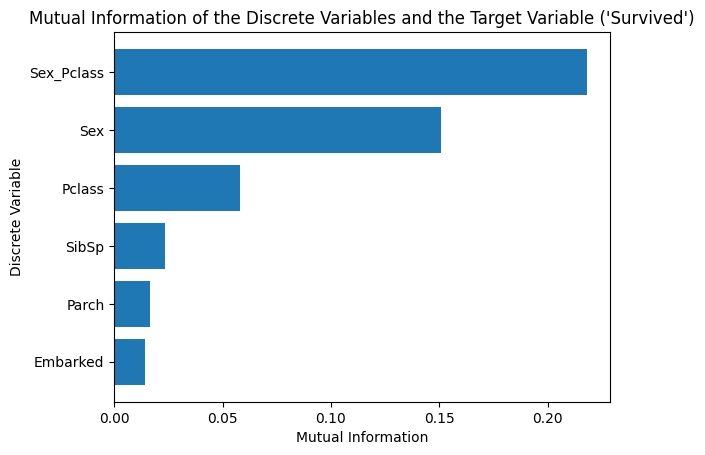

In [44]:
# calculating the MI per discrete feature
vars = ["Pclass", "Sex", "SibSp", "Parch", "Embarked", "Sex_Pclass"]

MIs = []
for var in vars:
    MIs.append(cal_MI(var))

sort_idx = np.argsort(MIs)

plt.barh(np.array(vars)[sort_idx], np.array(MIs)[sort_idx])
plt.xlabel("Mutual Information")
plt.ylabel("Discrete Variable")
plt.title("Mutual Information of the Discrete Variables and the Target Variable ('Survived')")
plt.show()

From the plot above, we see that 'Survived' depends most on 'Sex-Pclass'. To see which categories of 'Sex-Pclass' are most predictive of 'Survived', we will compare the MIs of all the categories of 'Sex-Pclass' with the target variable.

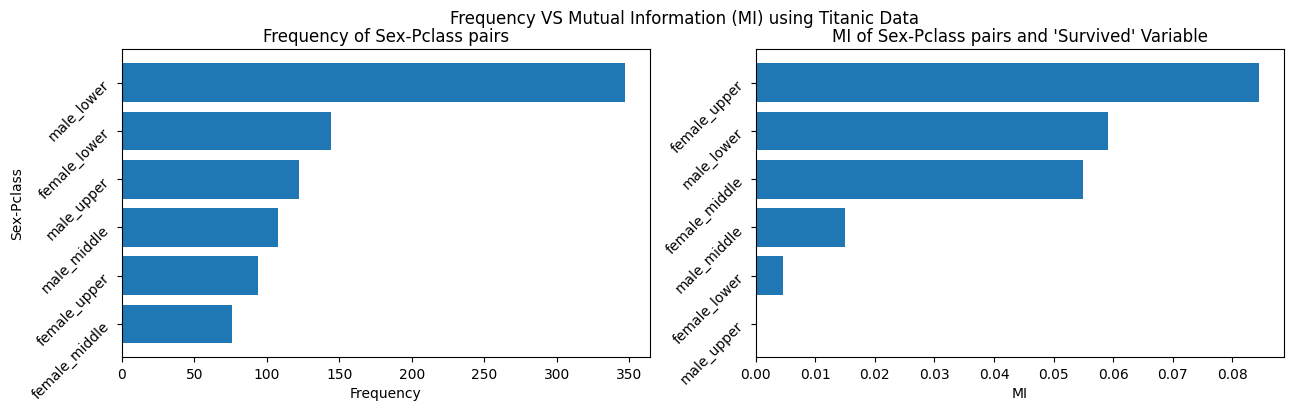

In [45]:
# comparing frequency with MI for 'Sex-Pclass' and 'Survived' variables.
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
val_count_series = titanic_df['Sex_Pclass'].value_counts(sort=True, ascending=True)
plt.barh(val_count_series.index, val_count_series.values)
plt.xlabel("Frequency")
plt.ylabel("Sex-Pclass")
plt.title("Frequency of Sex-Pclass pairs")
plt.yticks(rotation=45)

plt.subplot(1, 2, 2)
Sex_Pclass_MIs = cal_MI("Sex_Pclass", per_X=True).sort_values(ascending=True)
plt.barh(Sex_Pclass_MIs.index, Sex_Pclass_MIs.values)
plt.yticks(rotation=45)
plt.xlabel("MI")
plt.title("MI of Sex-Pclass pairs and 'Survived' Variable")

plt.suptitle("Frequency VS Mutual Information (MI) using Titanic Data")

plt.show()

From the plots above, we see that 'female_upper', 'male_lower', and 'female_middle' are the most informative in predicting if a passenger survived the shipwreck or not. Although lower class males are the most common passengers, being a lower class male is not the **most** informative (on if a passenger survived the shipwreck). Specifically, being an upper class female is the most informative on if a passenger survived the shipwreck although there are relatively low number of upper class female in the ship. We now see that relying on only frequency when looking for relationship between two discrete variables is not sufficient. It should be noted that MI only tells us how informative a variable is in knowing if a passenger will survive or not, it does not tell us the particular category of the target variable ('Survived') that the variable highly depends on (has high co-occurence with). One way to ascertain this is to look at the proportion of each category of 'Sex-Pclass' in each category of 'Survived' (we can also look at their PMI values as shown [here](#scrollTo=CAO2sijgn04t)). First, we need to create a contigency table.


Contingency table (also called crosstab) is a frequency distribution table that summarize the relationship between two discrete variables.

In [46]:
# creating a contingency table for 'Sex_Pclass'  and 'Survived'
count_per_sex_pclass_per_survived = pd.crosstab(index=titanic_df['Sex_Pclass'], columns=titanic_df['Survived'])
count_per_sex_pclass_per_survived

Survived,0,1
Sex_Pclass,,
female_lower,72,72
female_middle,6,70
female_upper,3,91
male_lower,300,47
male_middle,91,17
male_upper,77,45


In [47]:
# finding the proportion per 'Sex_Pclass' category
prop_per_sex_pclass_per_survived = count_per_sex_pclass_per_survived.div(count_per_sex_pclass_per_survived.sum(axis=1), axis=0)
prop_per_sex_pclass_per_survived

Survived,0,1
Sex_Pclass,,
female_lower,0.500000,0.500000
female_middle,0.078947,0.921053
female_upper,0.031915,0.968085
male_lower,0.864553,0.135447
male_middle,0.842593,0.157407
male_upper,0.631148,0.368852


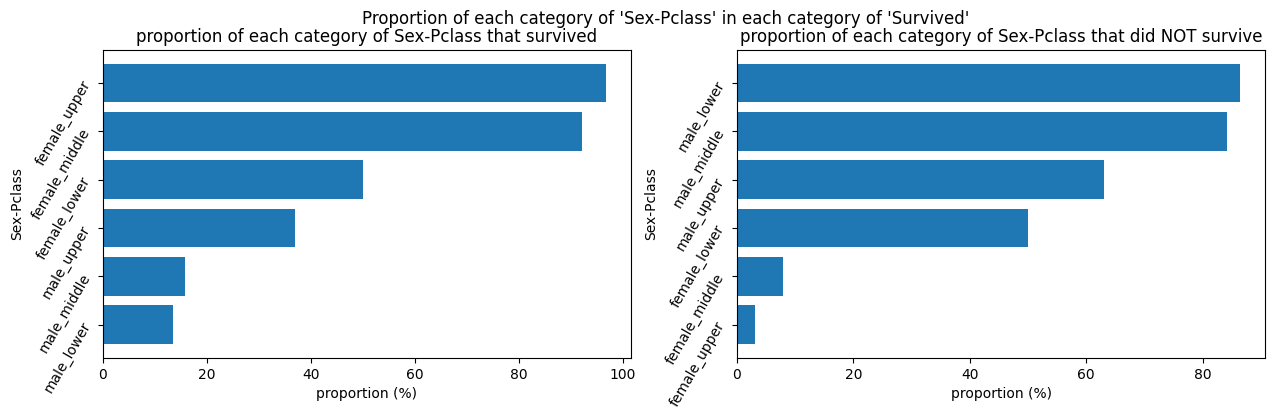

In [48]:
# Proportion of each category of 'Sex-Pclass' in each category of 'Survived

# 'Survived' = 1
plt.figure(figsize=(15, 4))

survived_val_count_series = 100 * prop_per_sex_pclass_per_survived.sort_values(by=1, ascending=True)

plt.subplot(1, 2, 1)
plt.barh(survived_val_count_series.index, survived_val_count_series[1])
plt.ylabel("Sex-Pclass")
plt.xlabel("proportion (%)")
plt.title("proportion of each category of Sex-Pclass that survived")
plt.yticks(rotation=60)

# 'Survived' = 0
not_survived_val_count_series = 100 * prop_per_sex_pclass_per_survived.sort_values(by=0, ascending=True)

plt.subplot(1, 2, 2)
plt.barh(not_survived_val_count_series.index, not_survived_val_count_series[0])
plt.ylabel("Sex-Pclass")
plt.xlabel("proportion (%)")
plt.title("proportion of each category of Sex-Pclass that did NOT survive")
plt.yticks(rotation=60)

plt.suptitle("Proportion of each category of 'Sex-Pclass' in each category of 'Survived'")

plt.show()

We see that over 95% of 'female_upper' survived, while only less than 15% of 'male_lower' survived (despite them having the highest overall frequency in the data). So, 'female_upper' are more likely to survive the Titanic shipwreck than other categories, while 'male_lower' are more likely to NOT survive than other categories.


## (OPTIONAL): Extra Topics (will not be part of this week's assignment and quiz).

A violin plot serves similar purpose as a [box-and-whisker](#scrollTo=LK6yoPMGJMSI) plot in that it shows the distribution of a data. Unlike a box-and-whisker plot, a violin plot is created using a kernel density estimate of the underlying distribution.

![violin plot](https://orange3.readthedocs.io/projects/orange-visual-programming/en/latest/_images/ViolinPlot-boxplot.png)

In [49]:
titanic_df_copy = titanic_df.copy()
titanic_df_copy['Survived'] = titanic_df_copy['Survived'].astype(str)

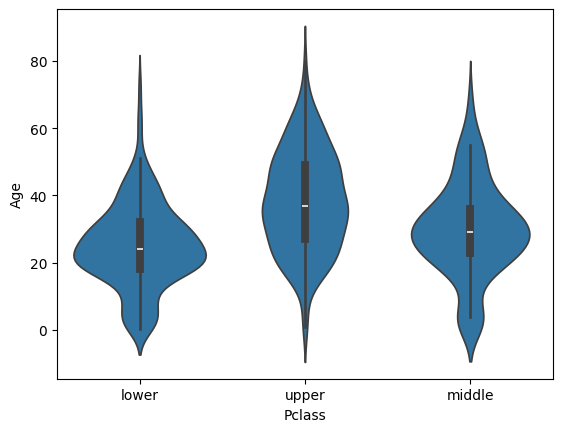

In [50]:
ax = sns.violinplot(data=titanic_df_copy, y="Age", x="Pclass")

Using Matplotlib's OOP interface to re-create [this](#scrollTo=8Iw5WC4uUTIG&line=1&uniqifier=1) 2 x 3 subplot.

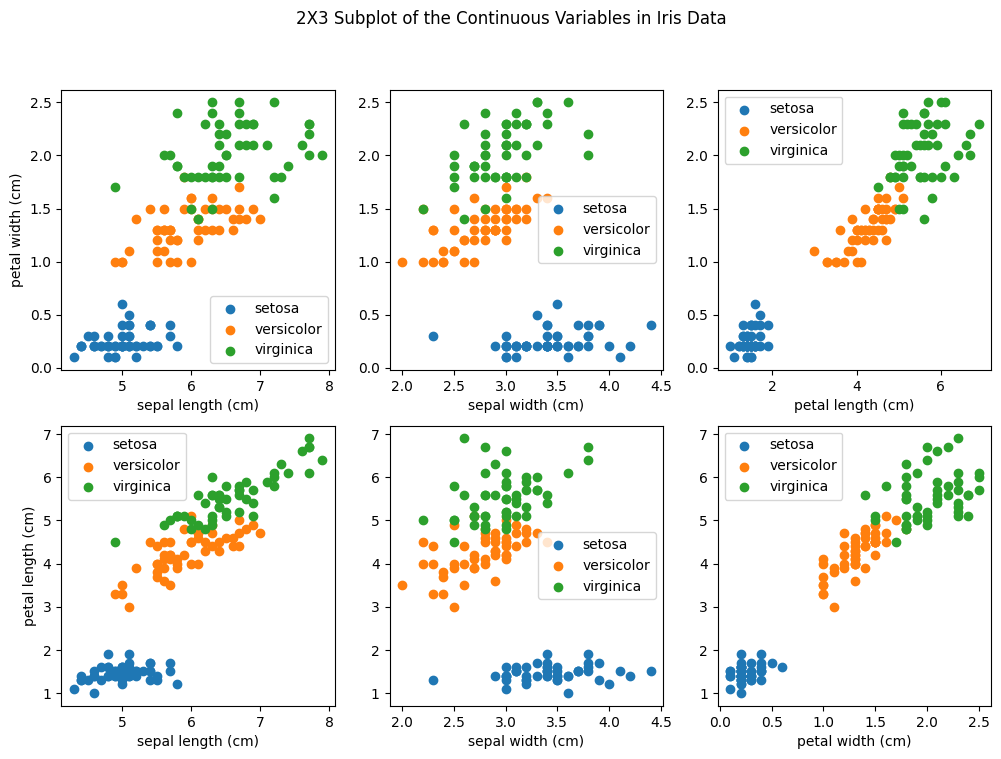

In [51]:
continuous_cols = iris_df.columns[:4] # selecting the continuous variables int the data

rows = ('petal_width', 'petal_length') # variables to use as y-axis for each subplot row

unique_species = iris_df['species'].unique() # unique species

fig, ax = plt.subplots(2, 3) # creating figure and axes objects.

fig.set_size_inches(12, 8) # figure width set to 12in and height to 8in

for i in range(2):
    cols = [col for col in continuous_cols if col != rows[i]] # all continuous columns except the one to be used as
                                                              # y-axis for the current row
    for j in range(3):
        y = iris_df[rows[i]] # y data
        x = iris_df[cols[j]] # x data

        # plot data of x and y for each species
        for species in unique_species:
            species_mask = iris_df['species'] == species
            ax[i, j].scatter(x[species_mask], y[species_mask], label=species)

        ax[i, j].legend() # same as plt.legend in stateful plots. .legend is used to show the labels

        ax[i, j].set_xlabel(f"{' '.join(cols[j].split('_'))} (cm)") # stateless way of setting x label

        if j == 0:
            ax[i, j].set_ylabel(f"{' '.join(rows[i].split('_'))} (cm)") # stateless way of setting y label

fig.suptitle("2X3 Subplot of the Continuous Variables in Iris Data") # stateless way of setting super title (title of the figure)

fig.show() # stateless way of displaying figure window.

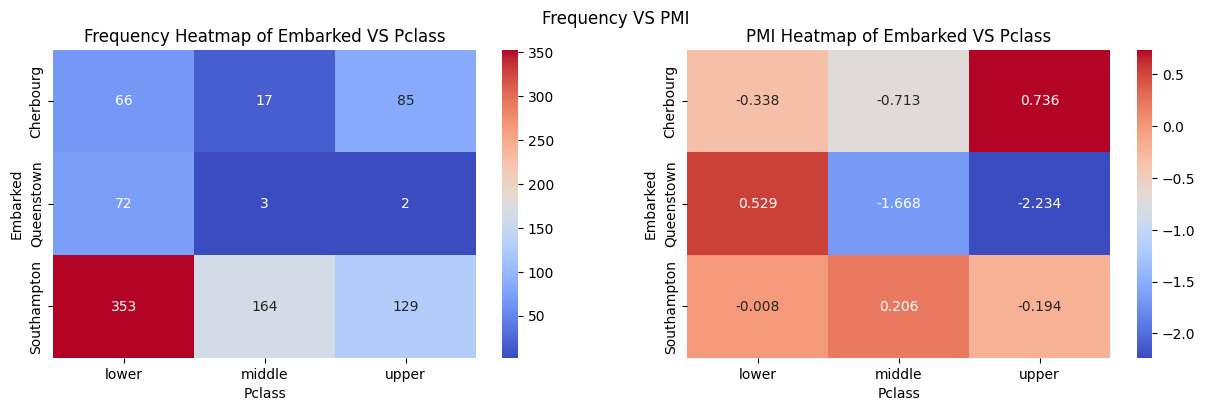

In [52]:
fig = plt.figure(figsize=(15, 4))

ax = fig.add_subplot(1, 2, 1)
ax.set_title("Frequency Heatmap of Embarked VS Pclass")
crosstab_emb_plcass = pd.crosstab(index=titanic_df['Embarked'], columns=titanic_df['Pclass'])
sns.heatmap(data=crosstab_emb_plcass, annot=crosstab_emb_plcass, fmt=".3g", cmap='coolwarm', ax=ax)

ax = fig.add_subplot(1, 2, 2)
ax.set_title("PMI Heatmap of Embarked VS Pclass")
pmi_emb_plcass = cal_PMI('Embarked', target_var='Pclass', data=titanic_df)
sns.heatmap(data=pmi_emb_plcass, annot=pmi_emb_plcass, fmt=".3f", cmap='coolwarm', ax=ax)

fig.suptitle("Frequency VS PMI")
plt.show()

Frequency and PMIs of each category in 'Sex-Pclass' with 'Survived' = 1


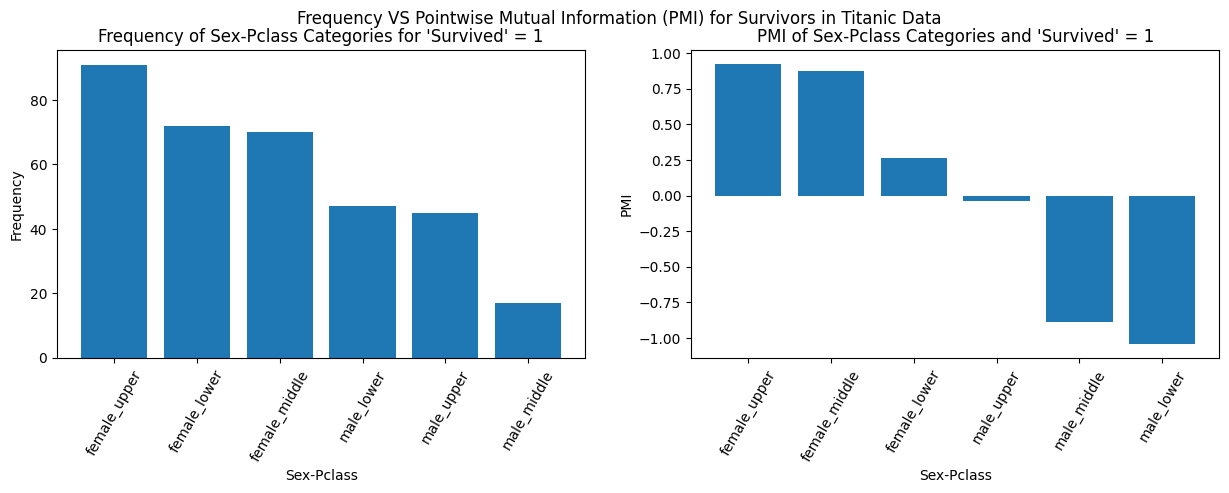

In [53]:
# comparing Frequency and PMIs of each category in 'Sex-Pclass' with 'Survived' = 1
plt.figure(figsize=(15, 4))

survived_val_count_series = titanic_df.loc[titanic_df['Survived'] == 1, 'Sex_Pclass'].value_counts(sort=True, ascending=False)

plt.subplot(1, 2, 1)
plt.bar(survived_val_count_series.index, survived_val_count_series.values)
plt.ylabel("Frequency")
plt.xlabel("Sex-Pclass")
plt.title("Frequency of Sex-Pclass Categories for 'Survived' = 1")
plt.xticks(rotation=60)

plt.subplot(1, 2, 2)
survived_Sex_Pclass_PMIs = cal_PMI("Sex_Pclass")[1].sort_values(ascending=False)
plt.bar(survived_Sex_Pclass_PMIs.index, survived_Sex_Pclass_PMIs.values)
plt.ylabel("PMI")
plt.xlabel("Sex-Pclass")
plt.xticks(rotation=60)
plt.title("PMI of Sex-Pclass Categories and 'Survived' = 1")

plt.suptitle("Frequency VS Pointwise Mutual Information (PMI) for Survivors in Titanic Data")

plt.show()

We see that the two plots are a bit similar. However, male_lower have the lowest PMI with 'Survived' = 1. This could be indicative of the fact that despite its number (frequency) in 'Survived' = 1 category, it is has an even higher frequency in 'Survived' = 0 category. In addition, we see that being a female is more informative on if a passenger survived the Titanic ship wreck because the PMI for all female categories is greater than 1. However, being an upper class female is the most informative on if a passenger survived.

Frequency and PMIs of each category in 'Sex-Pclass' with 'Survived' = 0

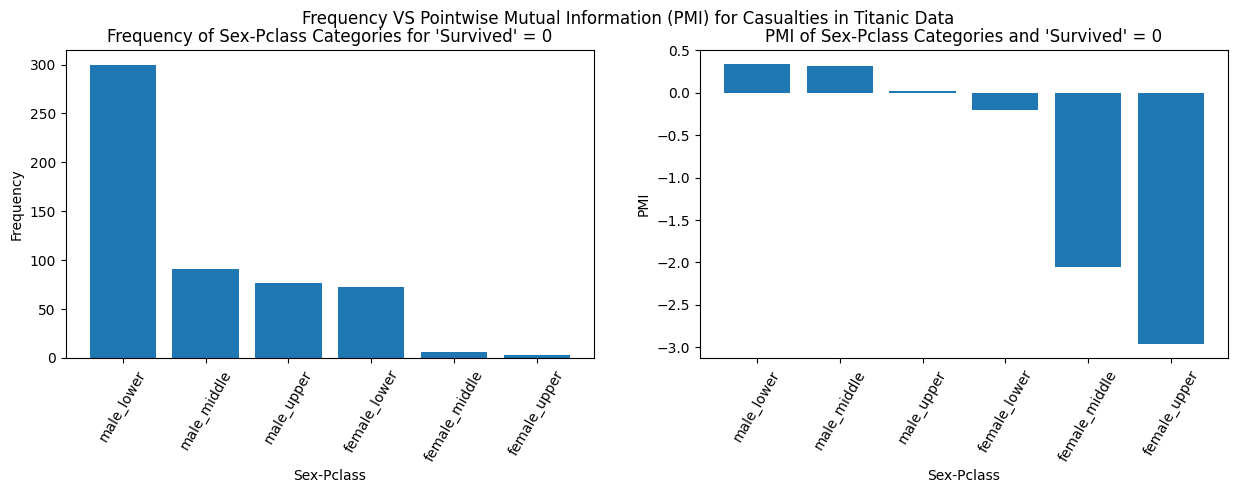

In [54]:
# comparing Frequency and PMIs of each category in 'Sex-Pclass' with 'Survived' = 0
plt.figure(figsize=(15, 4))

not_survived_val_count_series = titanic_df.loc[titanic_df['Survived'] == 0, 'Sex_Pclass'].value_counts(sort=True, ascending=False)

plt.subplot(1, 2, 1)
plt.bar(not_survived_val_count_series.index, not_survived_val_count_series.values)
plt.ylabel("Frequency")
plt.xlabel("Sex-Pclass")
plt.title("Frequency of Sex-Pclass Categories for 'Survived' = 0")
plt.xticks(rotation=60)

plt.subplot(1, 2, 2)
not_survived_Sex_Pclass_PMIs = cal_PMI("Sex_Pclass")[0].sort_values(ascending=False)
plt.bar(not_survived_Sex_Pclass_PMIs.index, not_survived_Sex_Pclass_PMIs.values)
plt.ylabel("PMI")
plt.xlabel("Sex-Pclass")
plt.xticks(rotation=60)
plt.title("PMI of Sex-Pclass Categories and 'Survived' = 0")

plt.suptitle("Frequency VS Pointwise Mutual Information (PMI) for Casualties in Titanic Data")

plt.show()

We see that the two plots are a bit similar. In addition, we see that being a male is more informative on if a passenger did not survive the Titanic ship wreck because the PMI for all male categories is greater than 1. However, being a lower class male is the most informative on if a passenger did not survive.

### Timeseries Plots

Timeseries data are data collected over a period of time.

Fertility Rate data of countries of the world obtained from [World Bank](https://databank.worldbank.org/indicator/NY.GDP.MKTP.CD/1ff4a498/Popular-Indicators).

In [55]:
fertility_rate_df = pd.read_csv("https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/fertility_rate.csv")
print(fertility_rate_df.shape)
fertility_rate_df.head()

(217, 20)


,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
0,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,Afghanistan,AFG,7.534,7.446,7.339,7.220,7.069,6.905,6.722,6.530,6.376,6.235,6.099,5.958,5.830,5.696,5.560,5.405
1,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,Albania,ALB,2.231,2.150,2.036,1.978,1.890,1.803,1.724,1.671,1.648,1.647,1.656,1.671,1.692,1.697,1.674,1.613
2,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,Algeria,DZA,2.566,2.507,2.456,2.481,2.512,2.555,2.604,2.677,2.753,2.813,2.843,2.880,2.956,2.957,3.004,3.041
3,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,1.240,1.180,1.250,1.190,1.270,NaN,NaN,NaN,NaN,NaN


Cleaning the data

In [56]:
fertility_rate_df.columns # checking the columns

Index(['Series Name', 'Series Code', 'Country Name', 'Country Code',
       '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]', '2003 [YR2003]',
       '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]',
       '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]',
       '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]'],
      dtype='object')

In [57]:
# setting the country names as the index of the dataframe and cleaning up the year names.

# Note that data is in currently in wide format

fertility_rate_df = fertility_rate_df.set_index("Country Name")
fertility_rate_df = fertility_rate_df.loc[:, fertility_rate_df.columns[3:]]
fertility_rate_df.columns = list(range(2000, 2016))
fertility_rate_df.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,,,,,,,
Afghanistan,7.534,7.446,7.339,7.220,7.069,6.905,6.722,6.530,6.376,6.235,6.099,5.958,5.830,5.696,5.560,5.405
Albania,2.231,2.150,2.036,1.978,1.890,1.803,1.724,1.671,1.648,1.647,1.656,1.671,1.692,1.697,1.674,1.613
Algeria,2.566,2.507,2.456,2.481,2.512,2.555,2.604,2.677,2.753,2.813,2.843,2.880,2.956,2.957,3.004,3.041
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,1.240,1.180,1.250,1.190,1.270,NaN,NaN,NaN,NaN,NaN


In [58]:
fertility_rate_df.isnull().sum() # checking the missing values per year

2000    6
2001    7
2002    7
2003    7
2004    7
2005    6
2006    6
2007    6
2008    6
2009    6
2010    6
2011    7
2012    5
2013    7
2014    7
2015    6
dtype: int64

In [59]:
# checking countries with the most number of missing values across all years
null_series = fertility_rate_df.isnull().sum(axis=1)
null_series[null_series > 0] / fertility_rate_df.shape[1] # fraction years with null values

Country Name
American Samoa              1.0000
Andorra                     0.6875
Cayman Islands              1.0000
Monaco                      1.0000
Northern Mariana Islands    1.0000
Palau                       0.7500
San Marino                  0.9375
dtype: float64

In [60]:
# dropping countries with missing values since their percentage of missing values across all years is > 50%
fertility_rate_df = fertility_rate_df.dropna(axis=0)
print(fertility_rate_df.shape)
fertility_rate_df.head()

(210, 16)


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,,,,,,,
Afghanistan,7.534,7.446,7.339,7.220,7.069,6.905,6.722,6.530,6.376,6.235,6.099,5.958,5.830,5.696,5.560,5.405
Albania,2.231,2.150,2.036,1.978,1.890,1.803,1.724,1.671,1.648,1.647,1.656,1.671,1.692,1.697,1.674,1.613
Algeria,2.566,2.507,2.456,2.481,2.512,2.555,2.604,2.677,2.753,2.813,2.843,2.880,2.956,2.957,3.004,3.041
Angola,6.639,6.601,6.567,6.533,6.499,6.461,6.419,6.372,6.320,6.260,6.194,6.120,6.039,5.953,5.864,5.774
Antigua and Barbuda,2.196,2.018,1.940,1.887,1.852,1.832,1.831,1.860,2.042,2.006,1.785,1.746,1.655,1.537,1.526,1.567


In [61]:
# converting the timeseries data to a 3-D numpy array of (txnxf).
# where t is year, n is country, f is feature (fertility-rate).
X = [fertility_rate_df.loc[:, t].values.reshape(-1, 1) for t in fertility_rate_df.columns]

print(len(X))
X[0][:5]

16


array([[7.534],
       [2.231],
       [2.566],
       [6.639],
       [2.196]])

In [62]:
X = np.array(X)
X.shape

(16, 210, 1)

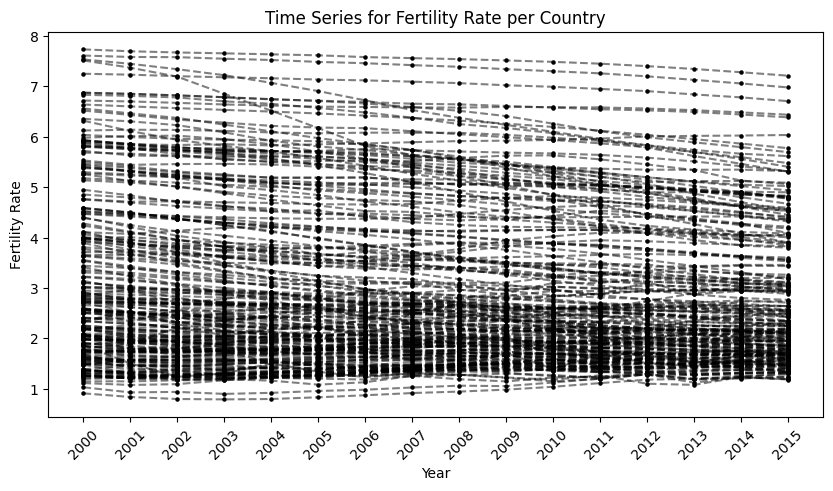

In [63]:
# time series plot
fig = plt.figure(figsize=(10, 5))

for f in range(X.shape[2]):
    ax = fig.add_subplot(1, 1, f+1)
    plt.plot(range(X.shape[0]), X[:, :, f], c='k', ls='--', alpha=0.5)
    for i in range(X.shape[1]):
        plt.scatter(range(X.shape[0]), X[:, i, f], c='k', s=5)
    ax.set_xlabel("Year")
    ax.set_ylabel("Fertility Rate")
    ax.set_title(f"Time Series for Fertility Rate per Country")
    ax.set_xticks(ticks=list(range(X.shape[0])), labels=list(range(fertility_rate_df.columns.min(), fertility_rate_df.columns.max()+1)), rotation=45)

plt.show()

### Choropleth

A choropleth is a type of thematic map in which areas are shaded or patterned in proportion to the value of a variable being represented. The term "choropleth" comes from the Greek words "choros," meaning area or region, and "plethos," meaning multitude.

In [64]:
t = -1
fig = px.choropleth(
    locations=list(fertility_rate_df.index),
    locationmode="country names",
    color=X[t, :, 0],
    scope="world",
    color_continuous_scale='bluered'
    )

fig.update_layout(title_text="Choropleth Showing the Fertility Rate per Country in year 2015")

fig.show()

Animation: choropleth over time

In [65]:
fertility_rate_df.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,,,,,,,
Afghanistan,7.534,7.446,7.339,7.220,7.069,6.905,6.722,6.530,6.376,6.235,6.099,5.958,5.830,5.696,5.560,5.405
Albania,2.231,2.150,2.036,1.978,1.890,1.803,1.724,1.671,1.648,1.647,1.656,1.671,1.692,1.697,1.674,1.613
Algeria,2.566,2.507,2.456,2.481,2.512,2.555,2.604,2.677,2.753,2.813,2.843,2.880,2.956,2.957,3.004,3.041
Angola,6.639,6.601,6.567,6.533,6.499,6.461,6.419,6.372,6.320,6.260,6.194,6.120,6.039,5.953,5.864,5.774
Antigua and Barbuda,2.196,2.018,1.940,1.887,1.852,1.832,1.831,1.860,2.042,2.006,1.785,1.746,1.655,1.537,1.526,1.567


In [66]:
# to visualize more dynamics over time, take the percentage increase in fertility rate per country over time
fertility_rate_df = 100 * fertility_rate_df.pct_change(axis=1).iloc[:, 1:]

In [67]:
# convert to a numpy array
X = [fertility_rate_df.loc[:, t].values.reshape(-1, 1) for t in fertility_rate_df.columns]

print(len(X))
X[0][:5]

15


array([[-1.16803823],
       [-3.6306589 ],
       [-2.29929852],
       [-0.57237536],
       [-8.10564663]])

In [68]:
X = np.array(X)
X.shape

(15, 210, 1)

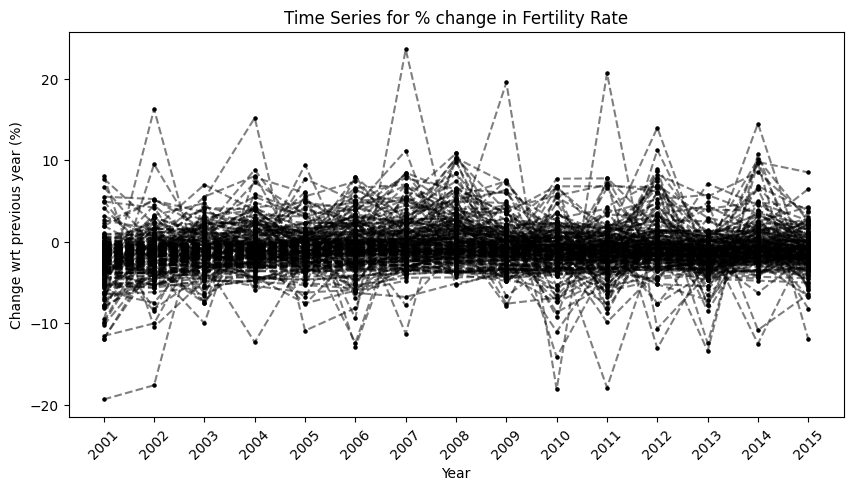

In [69]:
# time series plot of percentage increase in fertility rate per country over time
fig = plt.figure(figsize=(10, 5))

for f in range(X.shape[2]):
    ax = fig.add_subplot(1, 1, f+1)
    plt.plot(range(X.shape[0]), X[:, :, f], c='k', ls='--', alpha=0.5)
    for i in range(X.shape[1]):
        plt.scatter(range(X.shape[0]), X[:, i, f], c='k', s=5)
    ax.set_xlabel("Year")
    ax.set_ylabel("Change wrt previous year (%)")
    ax.set_title(f"Time Series for % change in Fertility Rate")
    ax.set_xticks(ticks=list(range(X.shape[0])), labels=list(range(fertility_rate_df.columns.min(), fertility_rate_df.columns.max()+1)), rotation=45)

plt.show()

In [70]:
# changing the data to long format
fertility_rate_df2 = pd.melt(
    fertility_rate_df.reset_index(),
    id_vars=['Country Name'],
    value_vars=list(fertility_rate_df.columns),
    var_name="Year",
    value_name="% change in fertility_rate"
    )

print(fertility_rate_df2.shape)
fertility_rate_df2.head()

(3150, 3)


,Country Name,Year,% change in fertility_rate
0,Afghanistan,2001,-1.168038
1,Albania,2001,-3.630659
2,Algeria,2001,-2.299299
3,Angola,2001,-0.572375
4,Antigua and Barbuda,2001,-8.105647


In [71]:
# formating the year as datetime. Animating Choropleth maps requires that time/dates be correctly formated
fertility_rate_df2['Year'] = pd.to_datetime(fertility_rate_df2['Year'].apply(lambda x: str(x) + "-01-01")).dt.date.astype(str)
fertility_rate_df2.head()

,Country Name,Year,% change in fertility_rate
0,Afghanistan,2001-01-01,-1.168038
1,Albania,2001-01-01,-3.630659
2,Algeria,2001-01-01,-2.299299
3,Angola,2001-01-01,-0.572375
4,Antigua and Barbuda,2001-01-01,-8.105647


In [72]:
fig = px.choropleth(fertility_rate_df2,
                    locations="Country Name",
                    locationmode="country names",
                    color='% change in fertility_rate',
                    color_continuous_scale="Viridis_r",
                    scope="world",
                    animation_frame='Year') #make sure 'Year' is string type and sorted in ascending order

fig.update_layout(title_text="Choropleth Animation Showing the % change in Fertility Rate per Country over time")

fig.show()